In [53]:
#Importar librerías
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

1. Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las dimensiones de estos set de datos?

In [9]:
#cargar entrenamiento
train = pd.read_csv("https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv")
print(train.head(10))
print()
print(f"Las dimensiones del set de entrenamiento son {train.shape}")

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   
5           0.277199          -0.010098          -0.105137         -0.997335   
6           0.279454          -0.019641          -0.110022         -0.996921   
7           0.277432          -0.030488          -0.125360         -0.996559   
8           0.277293          -0.021751          -0.120751         -0.997328   
9           0.280586          -0.009960          -0.106065         -0.994803   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526     

In [11]:
#cargar test
test = pd.read_csv("https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv")
print(test.head(10))
print()
print(f"Las dimensiones del set de testeo son {test.shape}")

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   
5           0.279220          -0.018620          -0.113902         -0.994455   
6           0.279746          -0.018271          -0.104000         -0.995819   
7           0.274601          -0.025035          -0.116831         -0.995594   
8           0.272529          -0.020954          -0.114472         -0.996784   
9           0.275746          -0.010372          -0.099776         -0.998373   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683     

2. Estudie la cantidad de registros que hay en cada actividad en el set de entrenamiento. Para esto, una opción es utilizar la función de pandas crosstab(index=columna, columns="count"). ¿Cómo se encuentran repartidas las Actividades? ¿Existe algún desbalance en las categorías? (realice un gráfico que acompañe su análisis) Comente.

In [27]:
#Obtener las frecuencias por actividad
actividad = train["Activity"]
frecuencia = actividad.value_counts()
print(frecuencia)

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


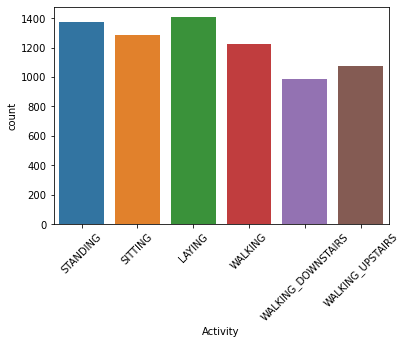

In [44]:
#gráfico actividades
sns.countplot(x = "Activity", data = train)
plt.xticks(rotation = 45)
plt.show()

3.Defina X_train y X_test como corresponda (omitiendo las variables que no corresponden a variables predictoras).

In [48]:
X_train = train.drop(["Activity", "subject"], axis = 1)
X_test = test.drop(["Activity", "subject"], axis = 1)

4. Estandarice el set de features de entrenamiento y prueba. Puede utilizar la función StandardScaler: x_stand = StandardScaler().fit_transform(x)

In [49]:
X_train_stand = StandardScaler().fit_transform(X_train)
X_test_stand = StandardScaler().fit_transform(X_test)

5. Defina y_train e y_test como corresponda (recuerde que debe estar codificada numéricamente). Para recodificar un vector o columna y de varias categorías a formato numérico puede utilizar: 
encoder=preprocessing.LabelEncoder().fit(y)
y_new=encodertrain.transform(y)

In [52]:
#Definir y
y_test = test["Activity"]
y_train = train["Activity"]

#recodificar en categorías y_test
encondertest = preprocessing.LabelEncoder().fit(y_test)
y_test = encondertest.transform(y_test)

#recodificar en categorías y_train

encondertrain = preprocessing.LabelEncoder().fit(y_train)
y_train = encondertrain.transform(y_train)


6. Utilice la función GridSearchCV para realizar 10 validaciones cruzadas con la lista de parámetros definida anteriormente. Determine la mejor combinación de parámetros y obtenga el modelo con dichos parámetros.